# Tensor Basics

How to create and manipulate tensors, from the point of view of someone who is familar with Numpy arrays. Then, we move beyond Numpy-like comparisons and consider differentiation.

## Imports

In [1]:
from typing import List, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import torch
from tqdm import tqdm

## 1D Tensors

### Creating

In [2]:
a = torch.tensor([0, 1, 2, 3, 4], dtype=torch.float32)
b = torch.FloatTensor([5, 6, 7, 8, 9])
c = torch.linspace(10, 14, steps=5)
c.type(torch.FloatTensor)

print(f'size of a = {a.size()}, which is the same as its shape = {a.shape}')
print(f'dimensions of a = {a.ndimension()}')
print(f'element 0 of a is {a[0]}')
print(f'type of tensor a is {a.dtype}, aka {a.type()}')

size of a = torch.Size([5]), which is the same as its shape = torch.Size([5])
dimensions of a = 1
element 0 of a is 0.0
type of tensor a is torch.float32, aka torch.FloatTensor


#### Interoperability with Numpy

In [3]:
numpy_x = np.array([0, 1, 2, 3, 4])
torch_x = torch.from_numpy(numpy_x) 
torch_x

tensor([0, 1, 2, 3, 4])

In [4]:
torch_y = torch.IntTensor([5, 6, 7, 8])
numpy_y = torch_y.numpy()
numpy_y

array([5, 6, 7, 8], dtype=int32)

#### Working with Elements

In [5]:
a[1:3]

tensor([1., 2.])

In [6]:
a[3] = -1
a

tensor([ 0.,  1.,  2., -1.,  4.])

### Reshaping Tensors

In [7]:
a_transpose = a.view(-1, 1)
a_transpose

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [-1.],
        [ 4.]])

### Tensor Algebra

In [8]:
d = a + 2 * b + c
d

tensor([20., 24., 28., 28., 36.])

In [9]:
torch.dot(a, d)

tensor(196.)

### Applying Universal Functions

In [10]:
d.mean() + d.max()

tensor(63.2000)

In [11]:
d[:2] = 3
d

tensor([ 3.,  3., 28., 28., 36.])

## 2D Tensors

## Creating

In [12]:
q = torch.FloatTensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

print(f'dimensions of q = {q.ndimension()}')
print(f'shape of q = {q.shape}')
print(f'number of elements in q = {q.numel()}')

dimensions of q = 2
shape of q = torch.Size([3, 3])
number of elements in q = 9


### Matrix Algebra

In [13]:
r = q * 2
s = torch.mm(q, r)
s

tensor([[ 30.,  36.,  42.],
        [ 84., 108., 132.],
        [138., 180., 222.]])

## Differentiation

In [14]:
x = torch.tensor(2., requires_grad=True)
y = x ** 2
y.backward()
x.grad

tensor(4.)

In [15]:
print(f'is x a leaf node in the computation graph? {x.is_leaf}')
print(f'is y a leaf node in the computation graph? {y.is_leaf}')

is x a leaf node in the computation graph? True
is y a leaf node in the computation graph? False


In [16]:
m = torch.tensor(2., requires_grad=True)
n = torch.tensor(1., requires_grad=True)
p = m + 2 * n
p.backward()

print(f'dp/dm at m = {m.grad}')
print(f'dp/dn at n = {n.grad}')

dp/dm at m = 1.0
dp/dn at n = 2.0


A more complex example that implments basic gradient descent in 1D, from first principles.

100%|██████████| 50/50 [00:00<00:00, 2436.76it/s]

x = 2.00


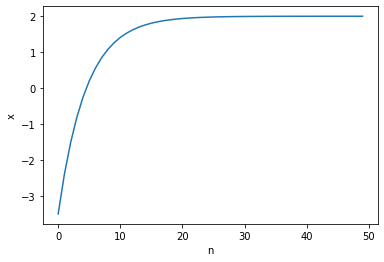

In [17]:
def f(x: torch.Tensor) -> torch.Tensor:
    return (x - 2) ** 2


n_iterations = 50
eta = 0.1

x = torch.tensor([-3.5], requires_grad=True)
x_hist: List[Tuple[int, float]] = []

for n in tqdm(range(n_iterations)):
    x_hist.append((n, x.detach().numpy()[0]))
    f(x).backward()
    x.data -= eta * x.grad
    x.grad.zero_()

print(f"x = {x.detach().numpy()[0]:.2f}")
_ = sns.lineplot(y="x", x="n", data=pd.DataFrame(x_hist, columns=["n", "x"]))


Repeating the above, but this time using PyTorch's internal optimisation routines.

100%|██████████| 50/50 [00:00<00:00, 3604.10it/s]


x = 2.00


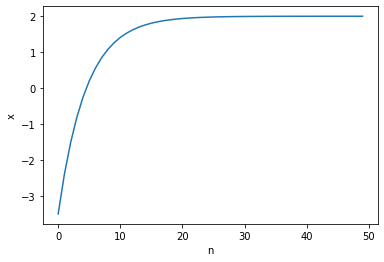

In [18]:
x_param = torch.nn.Parameter(torch.tensor([-3.5], requires_grad=True))
optimizer = torch.optim.SGD([x_param], lr=eta)
x_hist.clear()

for n in tqdm(range(n_iterations)):
    x_hist.append((n, x_param.detach().numpy()[0]))
    optimizer.zero_grad()
    f(x_param).backward()
    optimizer.step()

print(f"x = {x.detach().numpy()[0]:.2f}")
_ = sns.lineplot(y="x", x="n", data=pd.DataFrame(x_hist, columns=["n", "x"]))
